Sometimes we need to call some complicated funcions many times (1000 times) it is a part of some complex simulation... then the speed of the execution matters...

* for example in the simulations of the atomic physics there is a function con polylogarithm (Li)
* so PART of the loop was to calculate this polylogarithm for different inputs

https://www.mpmath.org/doc/current/functions/zeta.html

In [36]:
import mpmath

In [37]:
mpmath.polylog(3.0/2.0, 0.5)

mpf('0.62483702081991388')

In [40]:
xgrid=np.linspace(0.0,1.0,1001)

In [41]:
import time

timestamp1 = time.time()
for x in xgrid:
    calculations.append(mpmath.polylog(3.0/2.0,x))
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

Esta operacion tomo : 1.86 segundos


In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cos_taylor(x,k):
    cos=0
    for k in range(k):
        cos=cos+(-1)**k/math.factorial(2*k)*x**(2*k)
    return cos

In [14]:
import time
xtointerp=np.linspace(0,1,50000)

timestamp1 = time.time()
for x in xtointerp:
    calculations.append(cos_taylor(x,100))
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

Esta operacion tomo : 13.84 segundos


In [19]:
xvec=np.linspace(0,1,10)
yvec=[]
for x in xvec:
    yvec.append(cos_taylor(x,100))

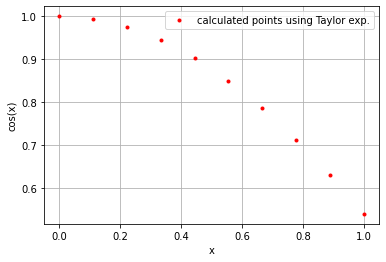

In [32]:
fig,ax=plt.subplots(1,1)
ax.plot(xvec,yvec,'.r',label='calculated points using Taylor exp.')
ax.set_xlabel('x')
ax.set_ylabel('cos(x)')

ax.legend()
ax.grid('True')

In [21]:
np.savetxt('yvec.txt', yvec,)
yvec=np.loadtxt('yvec.txt')

In [22]:
from scipy.interpolate import interp1d

In [23]:
spline3 = interp1d(xvec,yvec,kind='cubic')

In [24]:
interpolations=[]
calculations=[]

In [25]:
import time
xtointerp=np.linspace(0,1,50000)

timestamp1 = time.time()
for x in xtointerp:
    calculations.append(cos_taylor(x,100))
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

Esta operacion tomo : 13.61 segundos


In [26]:
import time
xtointerp=np.linspace(0,1,50000)

timestamp1 = time.time()
for x in xtointerp:
    # here Im calling ONLY the spline3(x) function for different x !!!!
    interpolations.append(spline3(x))
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

Esta operacion tomo : 2.32 segundos


# Lets make it even faster
* optimized Fortran routine

In [27]:
from scipy.interpolate import splev, splrep
spl = splrep(xvec,yvec,k=3)
# kind, optional: The degree of the spline fit. It is recommended to use cubic splines. Even values of k should be avoided especially with small s values. 1 <= k <= 5

In [28]:
interpolations_splrep=[]

In [29]:
import time
xtointerp=np.linspace(0,1,50000)
timestamp1 = time.time()

for x in xtointerp:
    # here Im calling ONLY the spline3(x) function for different x !!!!
    # spline3 is already a function
    interpolations_splrep.append(splev(x,spl))
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

Esta operacion tomo : 0.48 segundos


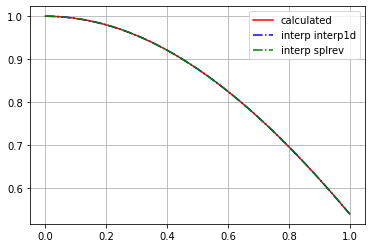

In [30]:
fig,ax=plt.subplots(1,1)
ax.plot(xtointerp,calculations,'-r',label='calculated')
ax.plot(xtointerp,interpolations,'-.b',label='interp interp1d')
ax.plot(xtointerp,np.array(interpolations_splrep),'-.g',label='interp splrev')
#ax.plot(xtointerp,np.cos(xtointerp),'-k',label='interpolations')
ax.legend()
ax.grid('True')